# Proyecto: Clasificación de vinos mediante K-means considerando 13 variables

In [1]:
# Importamos el modelo de K-Means:
from sklearn.cluster import KMeans

from sklearn import datasets 

from sklearn import metrics

import pandas as pd 

import matplotlib.pyplot as plt 

import numpy as np


In [2]:
# Cargamos datos:
data_wine = datasets.load_wine()
name_cols = data_wine.feature_names

In [3]:
# Extraemos caracteristicas (variables):
X_features = data_wine.data

In [4]:
# Hay 178 features, cada uno con 13 variables distintas:
X_features.shape

(178, 13)

In [5]:
# Pasamos la información a un 'DataFrame' de pandas:
x_train = pd.DataFrame(X_features, columns=name_cols)
x_train.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
# Podriamos seleccionar solo algunas columnas como datos de entrenamiento
# x_train = x_train[ ['magnesium', 'color_intensity'] ]

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

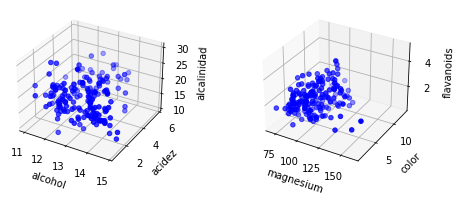

In [8]:
# visualizamos la relación entre 6 de las 13 variables:

# Seleccionamos 3 primeras variables:
var1 = x_train.alcohol
var2 = x_train.malic_acid
var3 = x_train.alcalinity_of_ash

# Seleccionamos otras 3 variables:
var4 = x_train.magnesium
var5 = x_train.color_intensity
var6 = x_train.flavanoids

name_var1 = 'alcohol'
name_var2 = 'acidez'
name_var3 = 'alcalinidad'
name_var4 = 'magnesium'
name_var5 = 'color'
name_var6 = 'flavanoids'


plt.figure()

ax1 = plt.subplot(1,2,1 , projection='3d')
ax1.scatter(var1, var2, var3 , marker='o' , c='blue')
ax1.set_xlabel(name_var1)
ax1.set_ylabel(name_var2)
ax1.set_zlabel(name_var3)

ax2 = plt.subplot(1,2,2 , projection='3d')
ax2.scatter(var4, var5, var6 , marker='o' , c='blue')
ax2.set_xlabel(name_var4)
ax2.set_ylabel(name_var5)
ax2.set_zlabel(name_var6)

plt.tight_layout() # <-- agrega espacio horizontal entre figuras
plt.subplots_adjust(wspace=0.5) # <-- espacio vertical entre figuras

plt.show()

In [9]:
# cargamos el modelo de K-Means:
K=3
model_kmeans = KMeans(n_clusters=K , max_iter=1000)

# Entrenamos el modelo
model_kmeans.fit(x_train)

# obtenemos las etiquetas encontradas:
#y_labels = model_kmeans.labels_

KMeans(max_iter=1000, n_clusters=3)

In [10]:
# Extraemos las etiquetas reales:
Y_labels = data_wine.target
Y_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [11]:
# Predecimos etiquetas:
y_kmeans = model_kmeans.predict(x_train)
y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [12]:
# Extraemos los datos de clasificación reales:
accuracy = metrics.adjusted_rand_score(Y_labels , y_kmeans)
accuracy
# Obs: hemos visto que si K < 3 o K > 3, el 'accuracy' es pequeño! 

0.37111371823084754

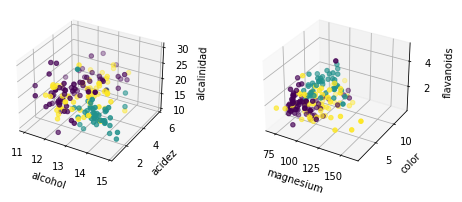

In [13]:
plt.figure()

ax1 = plt.subplot(1,2,1 , projection='3d')
ax1.scatter(var1, var2, var3 , marker='o' , c=y_kmeans)
ax1.set_xlabel(name_var1)
ax1.set_ylabel(name_var2)
ax1.set_zlabel(name_var3)

ax2 = plt.subplot(1,2,2 , projection='3d')
ax2.scatter(var4, var5, var6 , marker='o' , c=y_kmeans)
ax2.set_xlabel(name_var4)
ax2.set_ylabel(name_var5)
ax2.set_zlabel(name_var6)

plt.tight_layout() # <-- agrega espacio horizontal entre figuras
plt.subplots_adjust(wspace=0.5) # <-- espacio vertical entre figuras

plt.show()